<a href="https://colab.research.google.com/github/hoangcuongnguyen2001/Income-Analysis/blob/main/Income_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings 
warnings.filterwarnings("ignore")

%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/hoangcuongnguyen2001/Income-Analysis/main/Income_Analysis/adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


**Finding data types for all columns**

In [ ]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

**Finding missing values on analysis**

In [ ]:
df[df=='?']=np.nan
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [ ]:
null_columns =['workclass','occupation','native.country']
for i in null_columns:
    df.fillna(df[i].mode()[0], inplace=True)

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Private,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Private,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


*Checking duplicates:*

In [ ]:
data = df[df.duplicated()]
print(data)

       age         workclass  fnlwgt  ... hours.per.week  native.country income
8453    25           Private  308144  ...             40          Mexico  <=50K
8645    90           Private   52386  ...             35   United-States  <=50K
12202   21           Private  250051  ...             10   United-States  <=50K
14346   20           Private  107658  ...             10   United-States  <=50K
15603   25           Private  195994  ...             40       Guatemala  <=50K
17344   21           Private  243368  ...             50          Mexico  <=50K
19067   46           Private  173243  ...             40   United-States  <=50K
20388   30           Private  144593  ...             40         Private  <=50K
20507   19           Private   97261  ...             40   United-States  <=50K
22783   19           Private  138153  ...             10   United-States  <=50K
22934   19           Private  146679  ...             30   United-States  <=50K
23276   49           Private   31267  ..

In [ ]:
df = df.drop_duplicates()
display(df.describe())

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


**Exploratory Data Analysis**

In [ ]:
df.nunique()

age                  73
workclass             8
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           15
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       42
income                2
dtype: int64

In [ ]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


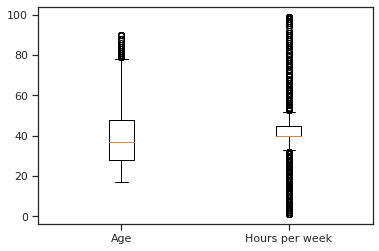

In [ ]:
plt.boxplot([df['age'], df['hours.per.week']], labels = ['Age', 'Hours per week'])
plt.show()

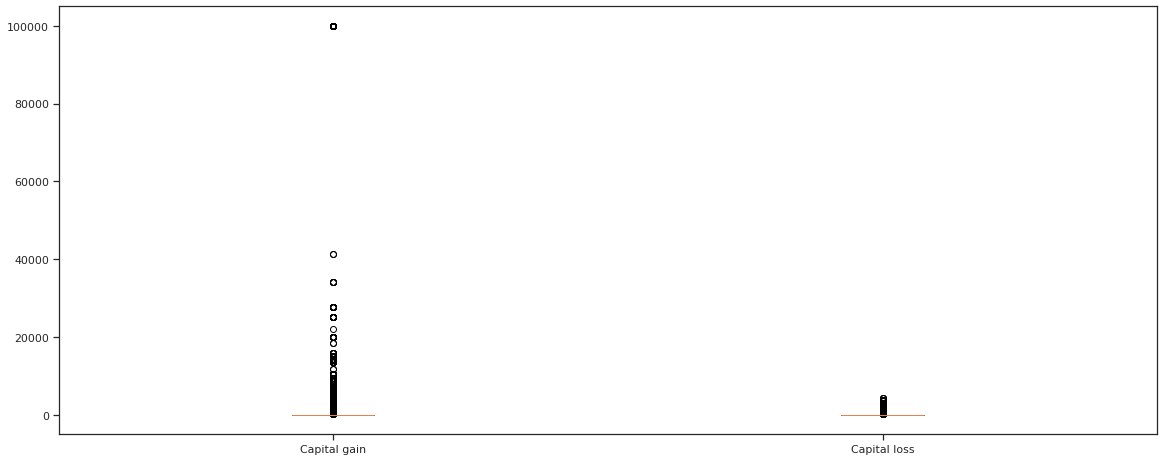

In [ ]:
def cm_to_inch(value):
    return value/2.54


plt.figure(figsize=(cm_to_inch(50), cm_to_inch(20)))

plt.boxplot([df['capital.gain'], df['capital.loss']], labels = ['Capital gain', 'Capital loss'])
plt.show()

In [ ]:
continuous = df.iloc[:, np.r_[0,2,10:13]]
categorical = df.iloc[:, np.r_[1,3:9]]

z_scores = stats.zscore(continuous)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df[filtered_entries]
new_df.describe()
print(new_df)


            age         workclass  ...  native.country income
4231   0.891740  Self-emp-not-inc  ...   United-States  <=50K
4232   0.102251           Private  ...   United-States  <=50K
4233   1.064254           Private  ...   United-States  <=50K
4234  -0.732217           Private  ...            Cuba  <=50K
4235   0.027541           Private  ...   United-States  <=50K
...         ...               ...  ...             ...    ...
32556 -1.358829           Private  ...   United-States  <=50K
32557 -0.828534           Private  ...   United-States  <=50K
32558  0.246943           Private  ...   United-States   >50K
32559  1.334568           Private  ...   United-States  <=50K
32560 -1.358829           Private  ...   United-States  <=50K

[27836 rows x 15 columns]


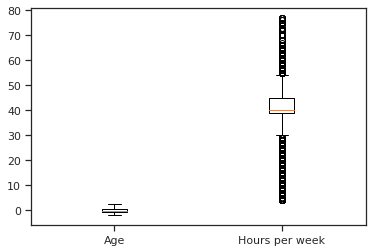

In [ ]:
plt.boxplot([new_df['age'], new_df['hours.per.week']], labels = ['Age', 'Hours per week'])
plt.show()

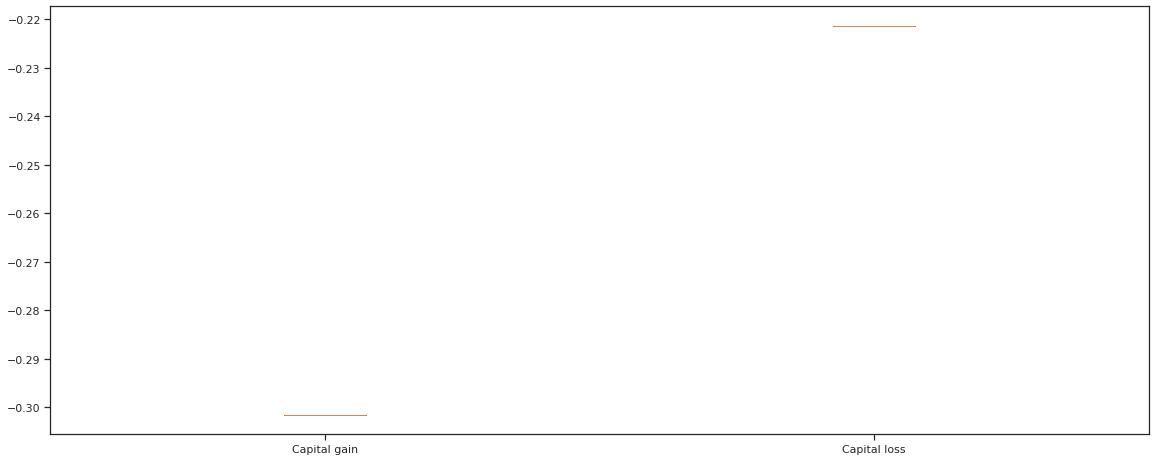

In [ ]:
plt.figure(figsize=(cm_to_inch(50), cm_to_inch(20)))

plt.boxplot([new_df['capital.gain'], new_df['capital.loss']], labels = ['Capital gain', 'Capital loss'])
plt.show()

Checking correlation

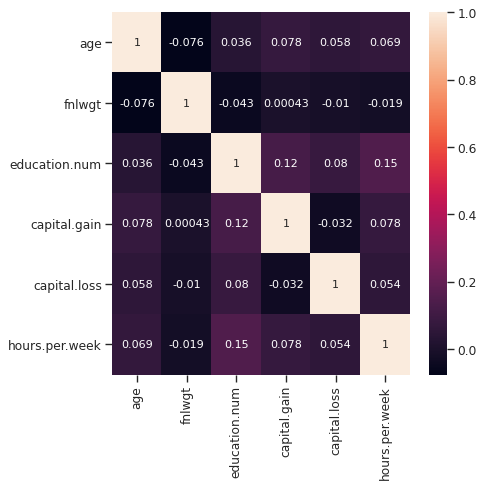

In [ ]:
#First method: using correlation matrix
from matplotlib.pyplot import figure

figure(figsize = (6,6), dpi = 80)
corrMatrix = continuous.corr()
sns.heatmap(corrMatrix, annot = True)
plt.show()

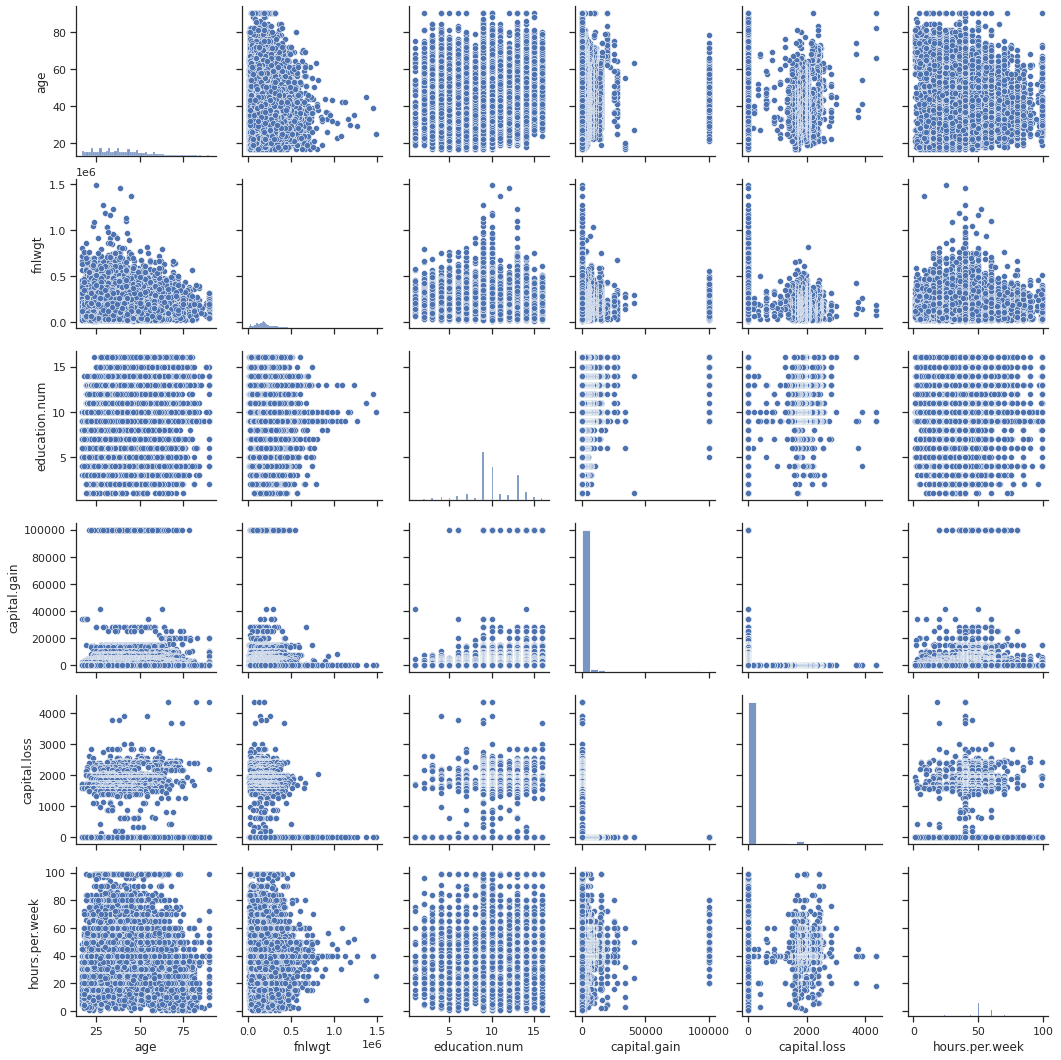

In [ ]:
#Second method: using scatterplot matrix

sns.set_theme(style="ticks")
sns.pairplot(continuous)

In [ ]:
new_df.skew()

age               0.031642
fnlwgt           -0.130180
education.num    -0.337145
capital.gain      0.000000
capital.loss      0.000000
hours.per.week   -0.349240
dtype: float64

Text(0, 0.5, 'No. of People')

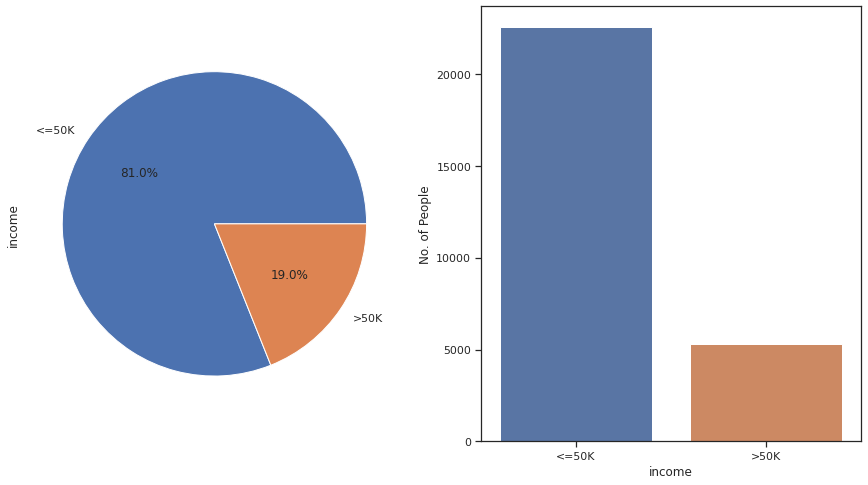

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
new_df['income'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(x='income',data=new_df)
plt.ylabel('No. of People')

Text(0, 0.5, 'No. of Individuals')

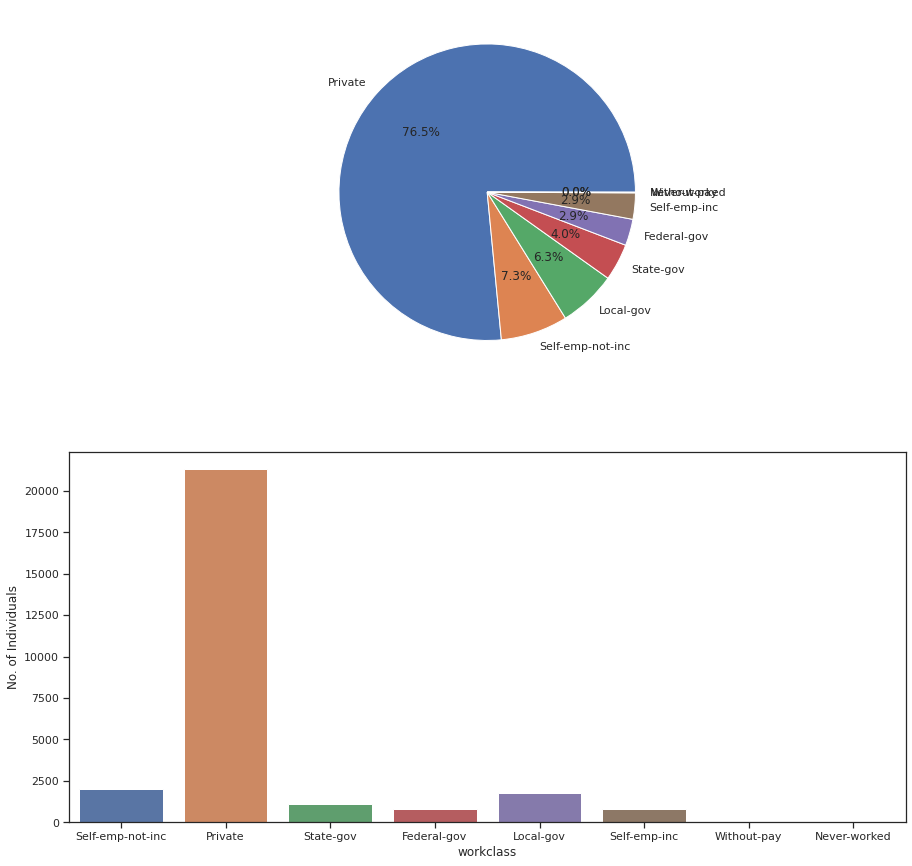

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
new_df['workclass'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.subplot(2,1,2)
sns.countplot(x='workclass',data=new_df)
plt.ylabel('No. of Individuals')

**Encode dependent variable**

In [ ]:

new_df.shape

(27836, 15)

In [ ]:
new_df['income'].value_counts()

<=50K    22559
>50K      5277
Name: income, dtype: int64

In [ ]:
#Create a checkpoint
new_df= new_df.copy()

new_df['income'] = new_df['income'].astype('str')
new_df['income'].replace(to_replace = ['<=50K', '>50K'], value =[0,1], inplace=True)
new_df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
4231,0.891740,Self-emp-not-inc,-1.089917,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.301547,-0.221295,13,United-States,0
4232,0.102251,Private,0.398812,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.301547,-0.221295,40,United-States,0
4233,1.064254,Private,0.562601,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.301547,-0.221295,40,United-States,0
4234,-0.732217,Private,1.340372,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.301547,-0.221295,40,Cuba,0
4235,0.027541,Private,0.957207,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,-0.301547,-0.221295,40,United-States,0


In [ ]:
new_df['income'].value_counts()


0    22559
1     5277
Name: income, dtype: int64

**Encode independent variable**

In [195]:
from sklearn.preprocessing import OrdinalEncoder
o=OrdinalEncoder()

for i in new_df.columns:
    if new_df[i].dtypes=='O' and i!='income':
        new_df[i]=o.fit_transform(new_df[i].values.reshape(-1,1))

new_df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
4231,0.891740,5.0,-1.089917,9.0,13,2.0,3.0,0.0,4.0,1.0,-0.301547,-0.221295,13,38.0,0
4232,0.102251,3.0,0.398812,11.0,9,0.0,5.0,1.0,4.0,1.0,-0.301547,-0.221295,40,38.0,0
4233,1.064254,3.0,0.562601,1.0,7,2.0,5.0,0.0,2.0,1.0,-0.301547,-0.221295,40,38.0,0
4234,-0.732217,3.0,1.340372,9.0,13,2.0,10.0,5.0,2.0,0.0,-0.301547,-0.221295,40,4.0,0
4235,0.027541,3.0,0.957207,12.0,14,2.0,3.0,5.0,4.0,0.0,-0.301547,-0.221295,40,38.0,0


*Remove skewness*

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

In [ ]:
for i in continuous:
    if np.abs(df[i].skew())>0.5:
        df[i]=pt.fit_transform(df[i].values.reshape(-1,1))

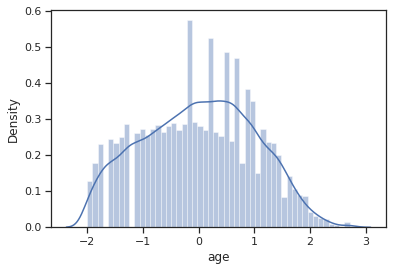

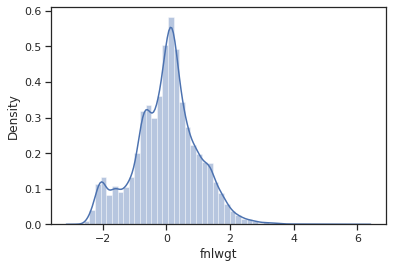

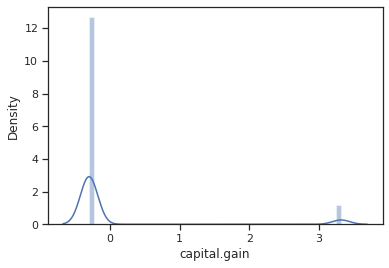

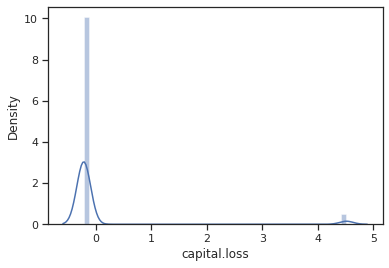

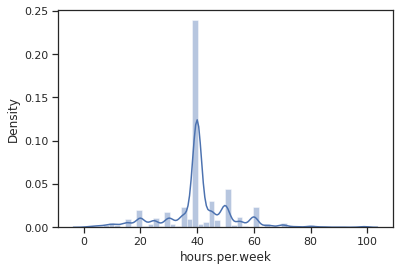

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in continuous:
    sns.distplot(df[i])
    plt.figure()

In [184]:
x=new_df.copy()
x.drop('income',axis=1,inplace=True)
y=new_df['income']

print(y)

4231     0
4232     0
4233     0
4234     0
4235     0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 27836, dtype: int64


*Rebalance the dataset*

In [192]:

from sklearn.utils import resample

# Separate majority and minority classes
new_df_majority = new_df[y==0]
new_df_minority = new_df[y==1]
 
# Upsample minority class
new_df_minority_upsampled = resample(new_df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=22559,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
new_df_upsampled = pd.concat([new_df_majority, new_df_minority_upsampled])
 
# Display new class counts
new_df_upsampled['income'].value_counts()

1    22559
0    22559
Name: income, dtype: int64